Epoch 1/20
110/110 [==============================] - 12s 76ms/step - loss: 0.0473 - val_loss: 0.0131
Epoch 2/20
110/110 [==============================] - 9s 85ms/step - loss: 0.0127 - val_loss: 0.0124
Epoch 3/20
110/110 [==============================] - 8s 76ms/step - loss: 0.0122 - val_loss: 0.0116
Epoch 4/20
110/110 [==============================] - 9s 78ms/step - loss: 0.0120 - val_loss: 0.0115
Epoch 5/20
110/110 [==============================] - 9s 79ms/step - loss: 0.0115 - val_loss: 0.0119
Epoch 6/20
110/110 [==============================] - 8s 77ms/step - loss: 0.0116 - val_loss: 0.0122
Epoch 7/20
110/110 [==============================] - 8s 71ms/step - loss: 0.0114 - val_loss: 0.0111
Epoch 8/20
110/110 [==============================] - 9s 78ms/step - loss: 0.0114 - val_loss: 0.0112
Epoch 9/20
110/110 [==============================] - 8s 73ms/step - loss: 0.0117 - val_loss: 0.0120
Epoch 10/20
110/110 [==============================] - 8s 73ms/step - loss: 0.0114 - val_l

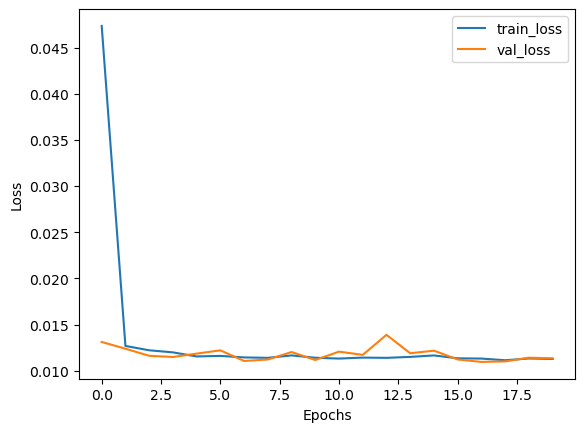

93/93 [==============================] - 4s 27ms/step


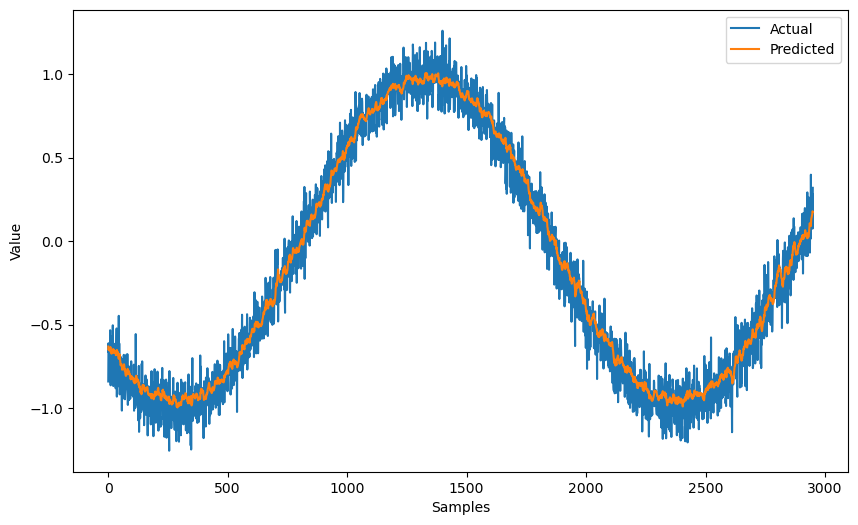

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

# Генерація даних
N = 10000
x = np.linspace(0, 10, N)
data = np.cos(3*x) + 0.1*np.random.randn(N)

# Підготовка даних для моделі RNN
sequence_length = 50
x_data, y_data = [], []
for i in range(len(data) - sequence_length):
    x_data.append(data[i:i+sequence_length])
    y_data.append(data[i+sequence_length])
    
x_data = np.array(x_data)
y_data = np.array(y_data)

# Розділення даних на тренувальний та тестовий набори
train_size = int(len(data) * 0.7)
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

# Побудова моделі
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(sequence_length, 1)))
model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Тренування моделі
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Графік втрат
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Передбачення за допомогою моделі
predictions = model.predict(x_test)

# Графік оригінальних даних та передбачень
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()